データの準備

In [3]:
# Google Driveからファイルを読み込む準備
# Colabo以外では削除
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# CSVファイル読み込み

# 別個ファイル名を入力することもできるように
print('\n開くファイル名を入力してください（デフォルトはdata.csv）: ')
fn = input()

# Googleドライブのフォルダ名は自動で補完
if fn == '':
  fn = '/content/drive/My Drive/data.csv'
else:
  fn = '/content/drive/My Drive/' + fn

# CSVを配列にするにはNumPyが一番簡単そう
import numpy as np

print(fn + 'を開いています...\n')

# numpy.loadtxtでもよさそうなのだが
# 改行コードの問題なのかエラーになるのでこちらで
data = np.genfromtxt(fn, delimiter = ',')

# データ前処置
# 欠損値を含む行を除去
data = data[~np.isnan(data).any(axis=1), :]

# 確認用にデータを一部表示
print('データサンプル（確認用）')
print(data)

print('\n最小値と最大値')
datamin = data.min(axis = 0)
datamax = data.max(axis = 0)
print(datamin[0], ',', datamin[1])
print(datamax[0], ',', datamax[1])


Mounted at /content/drive

開くファイル名を入力してください（デフォルトはdata.csv）: 

/content/drive/My Drive/data.csvを開いています...

データサンプル（確認用）
[[12435.   289.]
 [12440.   284.]
 [12445.   286.]
 ...
 [14990.   259.]
 [14995.   263.]
 [15000.   265.]]

最小値と最大値
12435.0 , 250.0
15000.0 , 289.0


LOF

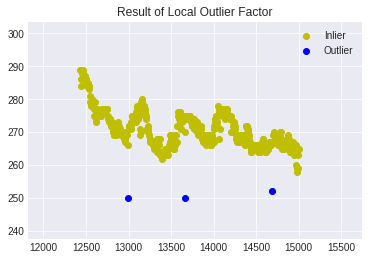

In [4]:
# 以下の書籍を参考に作成
# 清水琢也, 小川雄太郎. AIエンジニアを目指す人のための機械学習入門: 実装しながらアルゴリズムの流れを学ぶ. 技術評論社; 2020.

# 設定用の変数
set_plot_limit_auto = True
plot_limit_margin = 5
plot_xmin = datamin[0] * (1 - plot_limit_margin / 100)
plot_xmax = datamax[0] * (1 + plot_limit_margin / 100)
plot_ymin = datamin[1] * (1 - plot_limit_margin / 100)
plot_ymax = datamax[1] * (1 + plot_limit_margin / 100)

# 必要なライブラリのインポート
from sklearn.neighbors import LocalOutlierFactor

# n_neighborsの値をうまく設定することが重要
# 時系列データということを考えると前後の2値との比較
lof = LocalOutlierFactor(n_neighbors = 2)
lof.fit(data)
y_pred = lof.fit_predict(data)

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# 学習結果の可視化
plt.title('Result of Local Outlier Factor')
plt.scatter(data[y_pred==1][:, 0], data[y_pred==1][:, 1], label='Inlier', c='y')
plt.scatter(data[y_pred==-1][:, 0], data[y_pred==-1][:, 1], label='Outlier', c='b')
plt.legend(loc='upper right')

# 必要に応じてグラフの範囲を決定
if set_plot_limit_auto:
  plt.xlim(plot_xmin, plot_xmax)
  plt.ylim(plot_ymin, plot_ymax)

plt.show()

IF

No handles with labels found to put in legend.


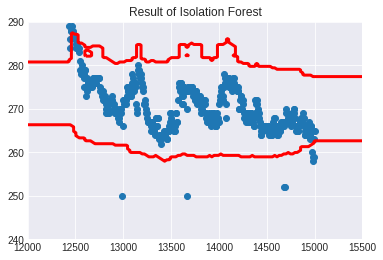

In [6]:
# 以下の書籍を参考に作成
# 清水琢也, 小川雄太郎. AIエンジニアを目指す人のための機械学習入門: 実装しながらアルゴリズムの流れを学ぶ. 技術評論社; 2020.

# 必要なライブラリのインポート
from sklearn.ensemble import IsolationForest

# 将来的にデフォルト値が変更される警告が出力されないように設定する
import warnings
warnings.simplefilter('ignore')

# IsolationForestの適用
# contaminationの値の設定が重要
isolation = IsolationForest(contamination=0.03)
isolation.fit(data)

# データおよび学習した決定境界の可視化
xx, yy = np.meshgrid(np.linspace(12000, 15500, 150),
                     np.linspace(240, 290, 150))

Z = isolation.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title('Result of Isolation Forest')
plt.scatter(data[:, 0], data[:, 1])
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
plt.legend(loc='upper left')
plt.xlim(12000, 15500)
plt.ylim(240, 290)

plt.show()